# topics:

- [Qustion 1](#Qustion-1):search about `cv2.cvtColor` and `cv2.threshold`
    - [Python OpenCV | cv2.cvtColor() method](https://www.geeksforgeeks.org/python-opencv-cv2-cvtcolor-method/)
    - [Image Thresholding - cv2.threshold](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html)
- cv.threshold
- Draw in image
- MASK in opencv


# Qustion 1

## `cv2.cvtColor`
![rgb_vs_gray.png](session_3/rgb_vs_gray.png)

In [3]:
import cv2  
file_path = 'session_3/sample_imge.jpeg'
img = cv2.imread(file_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY ) 
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV ) 

cv2.imshow('RGB', img)
cv2.imshow('img_gray', img_gray)
cv2.imshow('img_hsv', img_hsv)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### cv.threshold

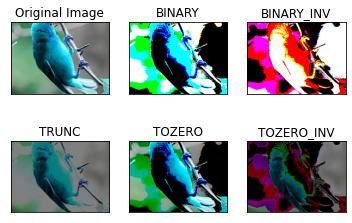

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('session_3/sample_imge.jpeg')
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Draw Shape in Image 

In [1]:
import cv2 as cv
import numpy as np

## make white image


In [4]:
image_np = np.full((480 , 640, 3) , (255,255,255) , np.uint8)
cv2.imshow('image_np', image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

## make red image

In [17]:
# red image
image_np = np.full((480 , 640, 3) , (0,0,255) , np.uint8)
cv2.imshow('image_np', image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

## fill image with black

In [23]:
image_np.fill(0) # make image black
cv2.imshow('image_np', image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

## create 3 white point on image


In [24]:
image_np[240,160] =  image_np[240,320]  = image_np[240,480]  = (255,255,255)
cv2.imshow('image_np', image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
image_np[:,:,2] =  0
image_np[:,:,1] =  0
image_np[:,:,0] =  255

cv2.imshow('image_np', image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
image_np[:,320,:] =  255
cv2.imshow('image_np', image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image_np[:,320,:] =  255
cv2.imshow('image_np', image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
# make  red + blue color 
image_np[100:600,100:200,2] =  255
cv2.imshow('image_np', image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()



## Draw triangle
![draw_triangle.png](session_3/draw_triangle.png)

- [help](https://stackoverflow.com/questions/51875114/triangle-filling-in-opencv)
- [documention](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html)

## with for loops? practice in home

In [38]:
pt1 = (150, 100)
pt2 = (100, 200)
pt3 = (200, 200)
triangle_cnt = np.array( [pt1, pt2, pt3] )
cv2.drawContours(image_np, [triangle_cnt], 0, (0,255,0), -1)
cv2.imshow('image_np', image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Draw triangle
![rgb_vs_hsv.png](session_3/rgb_vs_hsv.png)



# MASK in opencv

In [ ]:
# using mask to add two image
# Load two images
img1 = cv2.imread('session_3/digipen.jpg')
img2 = cv2.imread('session_3/opencv.png')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()